# Άσκηση 1
## Ακτινοβολία των αστέρων 
### Ήλιος - Ηλιακή σταθερά - Ηλιακό φάσμα

### Markdown
Τα κελιά του Jupyter Notebook μπορούν να οπτικοποιούν (αν είναι αυτή η σωστή λέξη) κώδικα markdown το οποίο δεν είναι τίποτα παραπάνω από εναν πιο εύκολο τρόπο για να γράφουμε μορφοποιημένο κείμενο. Τα κελιά που δεν περιέχουν κώδικα (όπως αυτό) είναι κελιά makrdown (τα φτιάχνουμε εύκολα χρησιμοποιώντας την επιλογή στη toolbar του notebook.

H markdown μπορεί να μορφοποιήσει, πίνακες, κώδικα (όχι προς εκτέλεση), λίστες αλλά και μαθηματικά σύμβολα μέσω κώδικα Latex.

Εκτός απο κείμενο το notebook μέσω ειδικών εντολών μπορεί να ενσωματώσει φωτογραφίες, ιστοσελίδες και βίντεο απο το youtube...

(http://jupyter.cs.brynmawr.edu/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb)

## Python

Στο πρώτο κελί θα φορτώσουμε τις βιβλιοθήκες που χρειαζόμαστε:
Η βιβλιοθήκη matplotlib (τη φορτώνουμε σαν plt) είναι μια βιβλιοθήκη γραφικών (διαγράμματα κλπ) που μπορεί να κάνει παπάδες. Μέσω της εντολής:
```python
%matplotlib inline
``` 
λέμε στη Jupyter να τυπώνει τα διαγράμματα μέσα στο notebook.

Η βιβλιοθήκη seaborn είναι μια νέα βιβλιοθήκη γραφικών που πατάει πάνω στη matplotlib και έχει κάποιες αισθητικές διορθώσεις. Απλά την φορτώνουμε και δεν χρειάζεται να κάνουμε κάτι παραπάνω.

Η pandas είναι μια τούμπανη βιβλιοθήκη για ανάλυση δεδομένων, θέλει εξάσκηση για να μην είσαι όλη την ώρα στο google να ψάχνεις πως γίνονται ακόμα και κάποια βασικά πράγματα αλλα αν πάρεις το κολάη(?) είσαι άρχοντας.

Η numpy είναι η πιο σημαντική βιβλιοθήκη για επιστημονικό προγραμματισμό. Στο πυρήνα της είναι το numpy array οι πίνακες δηλαδή που μετατρέπουν τις λίστες της python σε πίνακες-διανύσματα δηλαδή μαθηματικά αντικείμενα. Είναι δηλαδή η βιβλιοθήκη που έκανε τη Python must για επιστημονικό προγραμματισμό.

Η scipy είναι συλλογή αλγόριθμων και αριθμητιών μεθόδων για επιστημονικό προγραμματισμό. Από πράξεις πινάκων, μέχρι optimization, fitting, integration κλπ ***Must*** και αυτό.

Επειδή απο τη scipy δεν χρειαζόμαστε τα πάντα φορτώνουμε μόνο το curve_fit που κάνει απλά μη γραμμική μέθοδο ελαχίστων τετραγώνων και κάποιους αλγόριθμούς για αριθμητική ολοκλήρωση.

Πέρα από τις παραπάνω πολύ χρήσιμες βιβλιοθήκες είναι: 
- η **Sympy** τούμπανη βιβλιοθήκη για συμβολικές-αναλυτικές πράξεις (φάση mathematica) που μπορεί να συνεργαστεί με τους αριθμητικούς πίνακες. Με <s>λίγη</s> εξάσκηση κάνεις ταυτόχρονα και αριθμητικές μεθόδους, ζωγραφική και αναλυτική δουλειά :)

- η **astropy** που είναι βιβλιοθήκη για αστρονομικά δεδομένα. Πολλά πραγματα και εκεί, όπως φαντάζεστε εξαιρετικά χρήσιμη.

- η **statsmodels** βιβλιοθήκη για στατιστικές μεθόδους, πάλι για ανάλυση δεδομένων.

- **scikit-learn** για μεθόδους μηχανικής μάθησης (machine learning). Μια εξαιρετικά αναπτυσόμενη βιβλιοθήκη.

In [139]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import *

Παρακάτω ορίζουμε τις σταθερές. Υπάρχει και η δυνατότητα να ορίσουμε και μονάδες (η astropy μπορεί να το κάνει αυτό, ψάχτε το)

In [15]:
h=6.626e-34
c=3.0e8
k=1.38e-23

Ορίζουμε τη συνάρτηση Planck:
$$
Β_{\lambda} = A \frac{2hc^2}{\lambda ^5} \frac{1}{e^{hc/\lambda kT}-1}
$$
ο πάραγοντας A είναι μια σταθερά αναλογίας. Η ένταση ακτινοβολίας που δεχόμαστε απο τον ήλιο είναι ανάλογη της στερεάς γωνίας που βλέπουμε τον ηλιακό δίσκο.

In [42]:
def planck(l,T,A):
    return A*(2.0*h*c**2*l**(-5))*(np.exp(h*c/(l*k*T))-1.0)**(-1)

Στη συνάρτηση αφήνουμε σαν μεταβλητές πρώτα το μήκος κύματος (l) που είναι η ελέυθερη μεταβλητή. Οι "μεταβλητές" T,A είναι μεταβλητές που θέλουμε να fittαρουμε στα δεδομένα.
Παρακάτω εκτυπώνουμε, και ζωγραφίζουμε τη κατανομή planck για τον ήλιο $(T=5760 \,K, A=6.8\times 10^{-5} \, Sr)$

Μέσω της εντολής ```np.linspace(1e-8,1e-5,100)``` (δηλαδή την εντολή linspace της numpy) φτιάχνουμε ένα γραμμικό μονοδιάστατο πίνακα 100 στοιχείων από $10^{-8}$ έως $10^{-5}$

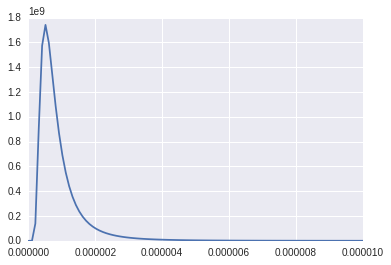

In [170]:
wavelengths = np.linspace(1e-8,1e-5,100)
planck(wavelengths,5750.0,6.8e-5)
plt.plot(wavelengths,planck(wavelengths,5750.0,6.8e-5))

### Αλλά καλύτερα δεν θα ήταν να κάναμε όλα σε λογαριθμικές κλίμακες?

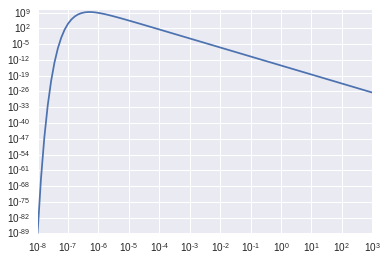

In [173]:
wavelengths = np.logspace(-8,3,100)
plt.loglog(wavelengths,planck(wavelengths,5750.0,6.8e-5))

# Pandas
Τώρα θα παίξουμε με τα δεδομένα που μας έχουν δωθεί απο παρατήρησεις στο οπτικό κομμάτι του φάσματος. Φορτώνουμε το αρχείο excel (κατευθείαν) μέσω της εντολής από τη βιβλιοθήκη pandas (την ορίσαμε για ευκολία pd)
```python
pd.read_excel('solar-flux.xls',header=None)
```


In [177]:
flux=pd.read_excel('solar-flux.xls',header=None)
flux

,0,1
0,200,0.7
1,220,4.5
2,240,5.2
3,260,13.0
4,280,23.0
5,300,56.0
6,320,76.0
7,340,91.0
8,360,97.0
9,370,113.0


Η μεταβλητή flux είναι μια μεταβλητή τύπου ***dataframe***.
Φανταστείτε το σαν ενα αρχείο excel.
Παρακάτω θα δώσουμε ονόματα (wl για το wavelength, Ι για την ειδική ένταση). Χρησιμοποιήσαμε αυτά τα όνοματα για ευκολία αλλα φανταστείτε οτί θα μπορούσαμε να βάλουμε και κώδικα latex στη θέση τους(!).
Λέμε στη Python να τα κάνει όλα τα δεδομένα τύπου Float. Μια παρένθεση εδώ: Στη python δεν χρειάζεται να ορίσουμε απο πριν τις μεταβλητές, όταν βλέπει ενα νούμερο τύπου 54 θεωρεί οτι η μεταβλητή είναι integer, γι αυτο καλύτερα να γράφουμε 54.0, παρατηρήστε:

In [182]:
54/5,54.0/5

(10, 10.8)

In [183]:
flux=flux.rename(columns={0:'wl',1:'I'})
flux=flux.astype('float')

Εδώ κάνουμε διορθώσεις στις μονάδες, τίποτα σημαντικό.

In [184]:
flux.wl=flux.wl*1e-9
flux.I=flux.I*(1e7)

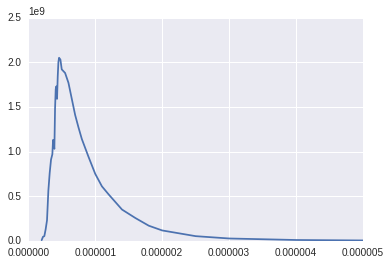

In [186]:
plt.plot(flux.wl,flux.I)

### Πόσο είναι το εμβαδό της καμπύλης?
H scipy εχει ενσωματεμένες διάφορους αλγόριθμους για αριθμητική ολοκλήρωση, θα χρησιμοποιήσουμε τη μέθοδο Composite Simpson μέσω της εντολής simps
Έχουμε φορτώσει όλες τις εντολές ολοκλήρωσης της Scipy οπότε απλα τη καλούμε:

In [193]:
simps(flux.I,flux.wl)

1375.2066666666667

### Non-linear Fit
Πάμε τώρα να fitt-αρουμε τα δεδομένα μας με μια καμπύλη planck και να βρούμε για ποιες τιμές των παραμέτρων A και T έχουμε τη καλύτερη συμπτωση.
H εντολή curve_fit επιστρέφει σαν αποτέλεσμα εναν πίνακα (p) με τα αποτελέσματα στις παραμέτρους (δηλαδή σε εμάς εναν πίνακα με δύο στοιχεία (A,T)) και έναν πίνακα (pc) της συνδιακύμανσης (covariance) για εμάς δηλαδή έναν πινακα 2X2 όπου στις διαγωνίους έχουμε τη διακύμανση των δύο παραμέτρων. Η ρίζα τούς είναι το σφάλμα για κάθε παράμετρο.

H Εντολή δέχεται πρώτα τη συνάρτηση (της μορφής που δώσαμε παραπάνω, δηλαδή πρώτα η ελευθερη μεταβλητή και μετά οι παράμετροι), μετα τα δεδομένα (x,y)). Πολύ σημαντικό είναι να δίνουμε και αρχικές τιμές στις παραμέτρους (p0=[1000.0,1.0]) γιατί το πιο πιθανό είναι -ειδικά για τόσες διαφορετικές τάξεις μεγέθους- να μην καταφέρει να βρεί την καλύτερη δυνατή λύση.

In [202]:
p,pc=curve_fit(planck,flux.wl,flux.I,p0=[1000.0,1.0])
print p
print pc
print np.sqrt(np.diag(pc))

[  5.39962116e+03   9.74230323e-05]
[[  7.21295008e+03  -7.21320868e-04]
 [ -7.21320868e-04   7.68301537e-11]]
[  8.49290885e+01   8.76528116e-06]


Όπως φαίνεται στο διάγραμμα παρακάτω η καμπύλη με τις τιμές των παραμέτρων που βρήκαμε δεν συμπίπτει.
Στο πρώτο διάγραμμα έχουμε τις δύο καμπύλες και τη διαφορά τους, στο δεύτερο έχουμε το λόγο του παρατηρούμενο φάσματος προς το ημιεμπειρικό (το πλησιέστερο θεωρητικό φάσμα planck)

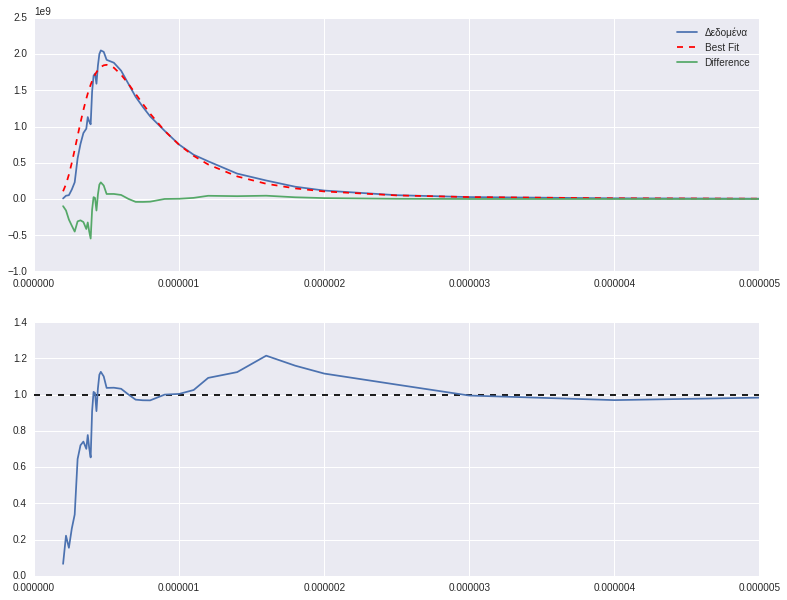

In [231]:
plt.figure(figsize=(13,10))
ax1=plt.subplot(211)
ax1.plot(flux.wl,flux.I,label=u'Δεδομένα') #Το u πριν το string λεει στη python να διαβασει unicode, δηλ. Ελληνικά
ax1.plot(flux.wl,planck(flux.wl,p[0],p[1]),'r--',label='Best Fit')
ax1.plot(flux.wl,flux.I-planck(flux.wl,p[0],p[1]),label='Difference')
ax1.legend()
ax2=plt.subplot(212)
ax2.hlines(1.0,0.0,flux.wl.max(),linestyle='--')
ax2.plot(flux.wl,(flux.I)/planck(flux.wl,p[0],p[1]))

Ο λόγος που έχουμε αυτή τη παρατηρούμενη διαφορά είναι η απορρόφηση σε διάφορα (και πολλά) μήκη κύματος του φωτός απο την ατμόσφαιρα της γής. Επειδή η μεγαλύτερη απορρόφηση γίνεται στα μικρά μήκη κύματος θα δοκιμάσουμε να κάνουμε fit μόνο στο κομμάτι του φάσματος δεξιά απο το peak, για αυτό βάζουμε μια μεταβλητή wlc που θα μας λέμε σε ποιό μήκος κύματος θα ξεκινήσουμε να παίρνουμε υπόψιν μας. Στη pandas παρατηρήστε πόσο εύκολο είναι αυτο:
```python
flux[flux.wl>wlc]
```

In [238]:
wlc=0.00000055
p,pc=curve_fit(planck,flux[flux.wl>wlc].wl,flux[flux.wl>wlc].I,p0=[1000.0,1.0])
sd=np.sqrt(np.diag(pc))

In [239]:
p,sd

(array([  5.81367572e+03,   6.83562127e-05]),
 array([  9.49174576e+01,   4.04229570e-06]))

Ας ζωγραφίσουμε πάλι το αποτέλεσμα μας μαζί με το διάστημα +-σ γύρω από τη βέλτιστη τιμη.

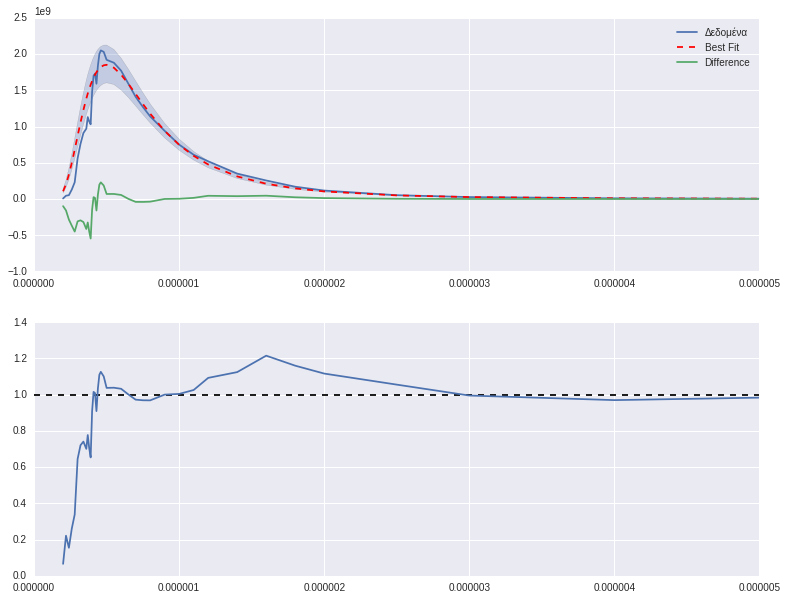

In [241]:
plt.figure(figsize=(13,10))
ax1=plt.subplot(211)
ax1.plot(flux.wl,flux.I,label=u'Δεδομένα') #Το u πριν το string λεει στη python να διαβασει unicode, δηλ. Ελληνικά
ax1.plot(flux.wl,planck(flux.wl,p[0],p[1]),'r--',label='Best Fit')
ax1.fill_between(flux.wl,planck(flux.wl,p[0]-sd[0],p[1]-sd[1]),planck(flux.wl,p[0]+sd[0],p[1]+sd[1]),alpha=0.25)
ax1.plot(flux.wl,flux.I-planck(flux.wl,p[0],p[1]),label='Difference')
ax1.legend()
ax2=plt.subplot(212)
ax2.hlines(1.0,0.0,flux.wl.max(),linestyle='--')
ax2.plot(flux.wl,(flux.I)/planck(flux.wl,p[0],p[1]))